<a href="https://colab.research.google.com/github/Elangoraj/Social-network-analysis/blob/main/Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pwd = '/content/drive/MyDrive/Networks/ia-enron.csv'

# Analyze a Network

**Load network**

In [4]:
import networkx as nx #---> Library for network analysis
import matplotlib.pyplot as plt #---> Library for creating plots
import collections #---> Library for operating with dictionaries
import random #---> Library for generating random numbers/distributions
import numpy as np #---> Library for efficiently operating with arrays/matrices/vectors
from pylab import rcParams
import matplotlib.colors as mcolors

In [5]:
fh = open(pwd, "rb")
Gx = nx.read_edgelist(fh)
fh.close()

**Adjacency Matrix**

In [6]:
# print(nx.adjacency_matrix(Gx))

Text(0, 0.5, 'node idx')

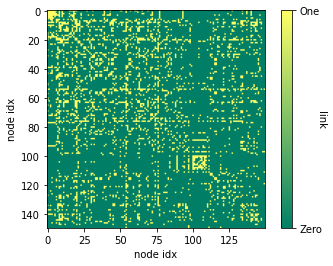

In [7]:
plt.imshow(nx.to_numpy_matrix(Gx), cmap='summer')
cbar = plt.colorbar()
cbar.set_ticks([0,1])
cbar.ax.set_yticklabels(['Zero','One'],)

cbar.set_label('link', rotation=270)
plt.xlabel('node idx')
plt.ylabel('node idx')

**Degree distribution**

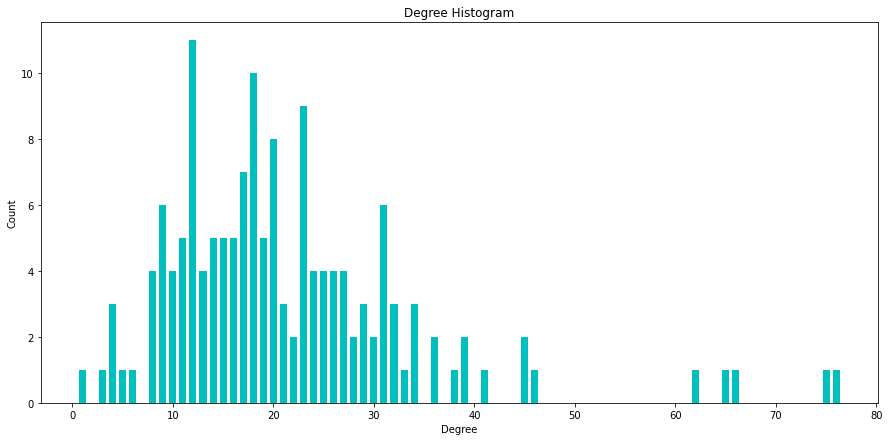

In [8]:
degree_sequence = sorted([d for n, d in Gx.degree()], reverse=True) 
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())                                       
# rcParams['figure.figsize'] = 18, 7 
plt.figure(figsize=(15,7))
plt.bar(deg, cnt, width=0.70, color='c') 

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

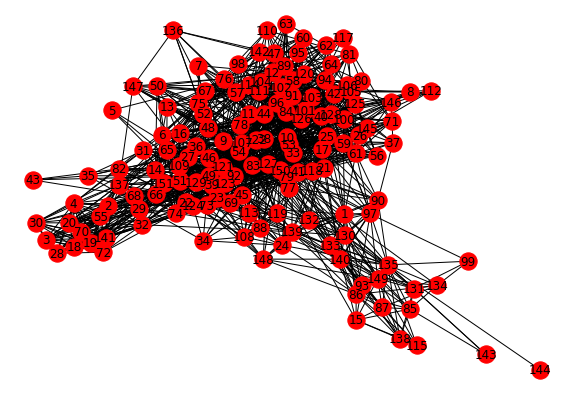

In [9]:
plt.figure(figsize=(10,7))
pos = nx.spring_layout(Gx)
plt.axis('off')
nx.draw(Gx,pos = pos, with_labels=True, node_color= 'r')
plt.show()

**Kolomoropv-Smirnov test**

In [10]:
dc = list(degreeCount.values())

In [11]:
from scipy.stats import lognorm, kstest

sigma, loc, scale = lognorm.fit(dc, floc=0)

mu = np.log(scale)

print("mu    = %9.5f" % mu)
print("sigma = %9.5f" % sigma)

stat, p = kstest(dc, 'lognorm', args=(sigma, 0, scale))
print("KS Test:")
print("stat    = %9.5f" % stat)
print("p-value = %9.5f" % p)

mu    =   0.97465
sigma =   0.76074
KS Test:
stat    =   0.20226
p-value =   0.05103


**Assortative or Disassortative**

In [12]:
nx.degree_assortativity_coefficient(Gx)
# https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Book%3A_Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama)/17%3A_Dynamical_Networks_II__Analysis_of_Network_Topologies/17.06%3A_Assortativity

-0.04538787508087504

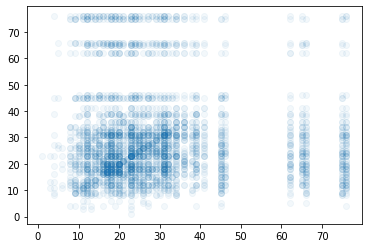

In [13]:
x = []
y = []

for i,j in Gx.edges():
  x.append(Gx.degree(i))
  y.append(Gx.degree(j))
  x.append(Gx.degree(j))
  y.append(Gx.degree(i))

plt.plot(x,y,'o',alpha=0.05)

**Fitting**

In [14]:
!pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24788 sha256=596a961baac8657d7aa4d56166262bf4815ef3a62360b8fd9f8e5e2e8d9d1d89
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


alpha=  4.21041781199002   sigma=  0.7365203583688135


Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


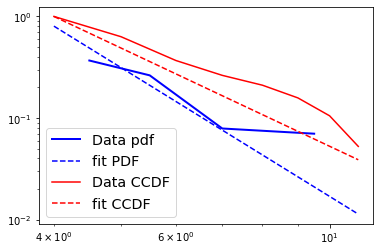

In [15]:
import powerlaw
D = list(degreeCount.values())

D_fit = powerlaw.Fit(D)
plot=D_fit.plot_pdf(color='b', linewidth=2)

D_fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf',ax = plot)

D_fit.plot_ccdf(color= 'r',ax = plot)
D_fit.power_law.plot_ccdf( color= 'r',linestyle='--',label='fit ccdf',ax = plot)

print('alpha= ',D_fit.power_law.alpha,'  sigma= ',D_fit.power_law.sigma)

plt.legend(['Data pdf', 'fit PDF', 'Data CCDF', 'fit CCDF'], fontsize = 'x-large')
plt.show()

# **Centrality and Community Detection**

# Centralities

**Degree centralities:** Degree centrality defined as measurement of the number of connections owned by a node. The higher the degree, the more central the node is. Depends on the direction of the network two seperate measures of degree centrality are defined, indegree and outdegree. Count of incoming ties is the indegree and count of outgoing ties is the outdegree.

Example: Finding popular person within the class in twitter, in medical science to find degree of protein, etc.

**Eigenvector centrality:** It is measures a node’s importance while giving consideration to the importance of its neighbors. Here a node with few connections could have high eigenvector centrality if those few connections were to very well-connected nodes.

Example: Finding Influential person in the country, key author in reseach, impactful people on social media, etc.

**Difference between Degree and Eigenvector centrality:** Degree centrality awards one centrality point for every link to the node. But in eigenvector centrality a node is important if it is linked to by another important nodes. Degree centrality gives the number of relationship degree conected to the node whereas enigenvector gives the influential node in the network. In Eigenvector centrality a node receiving many links does not necessarily have a high eigenvector centrality and a node with high eigenvector centrality is not necessarily highly linked which is opposite way of degree centrality. 

**When to apply:** Usually degree centrality is used when finding highly connected, popular individual, node which can quickly connect to wider network and one which holds most information in the network. Eigenvector is used to understand human social network and understanding networks like malware propogation.  

**Closeness centrality**

In [16]:
import scipy.sparse
import scipy.sparse.csgraph

adj_mat = nx.adjacency_matrix(Gx).tolil()
D = scipy.sparse.csgraph.floyd_warshall(adj_mat, directed=False, unweighted=False)
print(D[1])

[1. 0. 1. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 3. 2. 2. 2. 2. 1. 2. 3. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 3. 2. 2. 2.
 1. 2. 2. 3. 2. 1. 3. 2. 3. 2. 2. 3. 2. 3. 3. 2. 3. 2. 2. 2. 2. 1. 2. 2.
 3. 2. 2. 2. 2. 3. 3. 3. 2. 2. 2. 2. 3. 2. 3. 2. 2. 3. 2. 2. 3. 2. 2. 2.
 2. 2. 2. 3. 2. 3. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 3. 1. 2. 2. 1. 2. 2. 2.
 2. 2. 2. 2. 3. 2.]


In [17]:
def closeness_Centrality(mat):
  out = {}
  # adj_mat = nx.to_numpy_matrix(graph)
  n = len(D)
  for i in range(n):
    if np.sum(mat[i])>0:
      # out.append(round((n-1)/(np.sum(mat[i])),2))
      op = (n-1)/(np.sum(mat[i]))
      out[i] = op
  return out

In [18]:
closeness_cen = closeness_Centrality(D)
closeness_cen

{0: 0.5418181818181819,
 1: 0.4806451612903226,
 2: 0.49174917491749176,
 3: 0.5283687943262412,
 4: 0.4501510574018127,
 5: 0.44610778443113774,
 6: 0.5601503759398496,
 7: 0.5498154981549815,
 8: 0.6208333333333333,
 9: 0.5457875457875457,
 10: 0.5302491103202847,
 11: 0.5498154981549815,
 12: 0.5016835016835017,
 13: 0.5265017667844523,
 14: 0.5379061371841155,
 15: 0.3983957219251337,
 16: 0.43440233236151604,
 17: 0.4837662337662338,
 18: 0.48220064724919093,
 19: 0.5437956204379562,
 20: 0.645021645021645,
 21: 0.49174917491749176,
 22: 0.5340501792114696,
 23: 0.4983277591973244,
 24: 0.4584615384615385,
 25: 0.5033783783783784,
 26: 0.5173611111111112,
 27: 0.5137931034482759,
 28: 0.49174917491749176,
 29: 0.48220064724919093,
 30: 0.5379061371841155,
 31: 0.4983277591973244,
 32: 0.5246478873239436,
 33: 0.4318840579710145,
 34: 0.40821917808219177,
 35: 0.44744744744744747,
 36: 0.476038338658147,
 37: 0.436950146627566,
 38: 0.4837662337662338,
 39: 0.5155709342560554,
 40:

In [19]:
cl_ce = nx.closeness_centrality(Gx)
cl_ce

{'1': 0.4983277591973244,
 '10': 0.5359712230215827,
 '100': 0.473015873015873,
 '101': 0.5102739726027398,
 '102': 0.5068027210884354,
 '103': 0.5033783783783784,
 '104': 0.4885245901639344,
 '105': 0.48534201954397393,
 '106': 0.4670846394984326,
 '107': 0.6208333333333333,
 '108': 0.4745222929936306,
 '109': 0.49666666666666665,
 '11': 0.4950166112956811,
 '110': 0.4318840579710145,
 '111': 0.4745222929936306,
 '112': 0.40821917808219177,
 '113': 0.4983277591973244,
 '114': 0.4983277591973244,
 '115': 0.35645933014354064,
 '117': 0.43567251461988304,
 '118': 0.5120274914089347,
 '119': 0.48220064724919093,
 '12': 0.45565749235474007,
 '120': 0.4901315789473684,
 '121': 0.49666666666666665,
 '122': 0.645021645021645,
 '123': 0.5379061371841155,
 '124': 0.4950166112956811,
 '125': 0.5033783783783784,
 '126': 0.5209790209790209,
 '127': 0.6182572614107884,
 '128': 0.5379061371841155,
 '129': 0.5379061371841155,
 '13': 0.4806451612903226,
 '130': 0.476038338658147,
 '131': 0.43188405797

In [20]:
n = D.shape[0]
closeness_centrality = {}
for r in range(0, n):
    
    cc = 0.0
    
    possible_paths = list(enumerate(D[r, :]))
    shortest_paths = dict(filter( \
        lambda x: not x[1] == np.inf, possible_paths))
    
    total = sum(shortest_paths.values())
    n_shortest_paths = len(shortest_paths) - 1.0
    if total > 0.0 and n > 1:
        s = n_shortest_paths / (n - 1)
        cc = (n_shortest_paths / total) * s
    closeness_centrality[r] = cc

In [21]:
closeness_centrality

{0: 0.5418181818181819,
 1: 0.4806451612903226,
 2: 0.49174917491749176,
 3: 0.5283687943262412,
 4: 0.4501510574018127,
 5: 0.44610778443113774,
 6: 0.5601503759398496,
 7: 0.5498154981549815,
 8: 0.6208333333333333,
 9: 0.5457875457875457,
 10: 0.5302491103202847,
 11: 0.5498154981549815,
 12: 0.5016835016835017,
 13: 0.5265017667844523,
 14: 0.5379061371841155,
 15: 0.3983957219251337,
 16: 0.43440233236151604,
 17: 0.4837662337662338,
 18: 0.48220064724919093,
 19: 0.5437956204379562,
 20: 0.645021645021645,
 21: 0.49174917491749176,
 22: 0.5340501792114696,
 23: 0.4983277591973244,
 24: 0.4584615384615385,
 25: 0.5033783783783784,
 26: 0.5173611111111112,
 27: 0.5137931034482759,
 28: 0.49174917491749176,
 29: 0.48220064724919093,
 30: 0.5379061371841155,
 31: 0.4983277591973244,
 32: 0.5246478873239436,
 33: 0.4318840579710145,
 34: 0.40821917808219177,
 35: 0.44744744744744747,
 36: 0.476038338658147,
 37: 0.436950146627566,
 38: 0.4837662337662338,
 39: 0.5155709342560554,
 40:

**Comparison Centralities**

In [22]:
eg_ce = nx.eigenvector_centrality(Gx)
eg_ce

{'1': 0.05046824889190721,
 '10': 0.13267110319822245,
 '100': 0.06165811858790111,
 '101': 0.10657862352407114,
 '102': 0.07951022064542977,
 '103': 0.1013745161358682,
 '104': 0.07214004774985443,
 '105': 0.08402033664138243,
 '106': 0.053724035452634204,
 '107': 0.22196094375174705,
 '108': 0.046655272565864346,
 '109': 0.08894358349827293,
 '11': 0.06389508996326723,
 '110': 0.02922984601141684,
 '111': 0.06942190617616305,
 '112': 0.022278751346708193,
 '113': 0.07681173774034931,
 '114': 0.06167298130289612,
 '115': 0.004649405979295042,
 '117': 0.025283867425153924,
 '118': 0.08620185526673928,
 '119': 0.05840238044735349,
 '12': 0.040647956872883535,
 '120': 0.08328249153544229,
 '121': 0.07128877984900255,
 '122': 0.23999231568820278,
 '123': 0.114119981085853,
 '124': 0.06709473096109522,
 '125': 0.07421872062040594,
 '126': 0.13840774710881804,
 '127': 0.20701431561194422,
 '128': 0.12958105789762445,
 '129': 0.12610160403270523,
 '13': 0.056332371126458496,
 '130': 0.034790

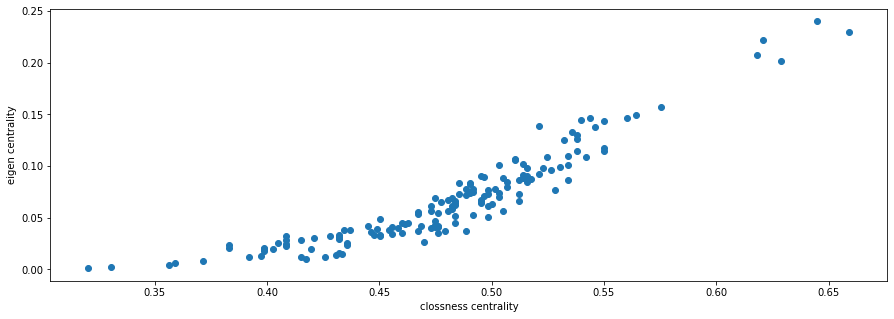

In [23]:
plt.figure(figsize=(15,5))
# plt.scatter(eg_ce.keys(),eg_ce.values())
plt.scatter(cl_ce.values(),eg_ce.values())
plt.xlabel('clossness centrality')
plt.ylabel('eigen centrality')
plt.show()

In [24]:
from scipy.stats import pearsonr
pearsonr(list(cl_ce.values()),list(eg_ce.values()))[0]

0.9250810688678448

**Centrality measure**

In [25]:
import operator
max(cl_ce.items(), key=operator.itemgetter(1)),max(eg_ce.items(), key=operator.itemgetter(1))

(('150', 0.6592920353982301), ('122', 0.23999231568820278))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  # This is added back by InteractiveShellApp.init_path()


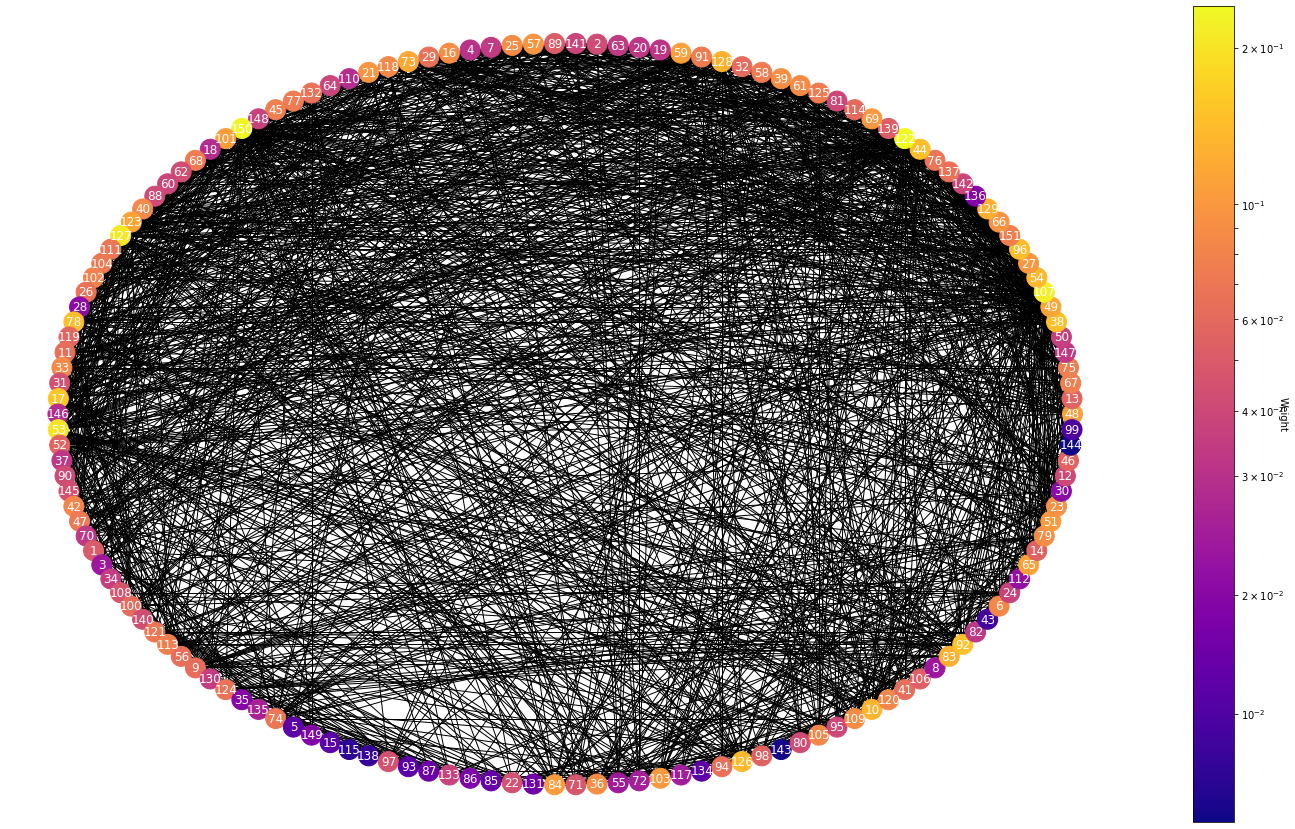

In [36]:
plt.figure(figsize=(25,15))
pos = nx.circular_layout(Gx)

nodes = nx.draw_networkx_nodes(Gx, pos, node_size=400, cmap=plt.cm.plasma, 
                                  node_color=list(eg_ce.values()),
                                  nodelist=list(eg_ce.keys())) #<-- Set the node attributes to be plotted,
                                                                  # with the network, the nodes position, 
                                                                  # the color map for the measure that comes 
                                                                  # in numbers ranging in the color map
  
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.03, linscale=1)) #<-- Seeting the color map of the nodes in a 

labels = nx.draw_networkx_labels(Gx, pos, font_color='white') #<-- Set the node labels
edges = nx.draw_networkx_edges(Gx, pos) #<-- Set the edges pisitions

# plt.title(measure_name) #<-- Set the title of the plot
cbar = plt.colorbar(nodes) #--> set the range of the color bar

cbar.set_label('Weight', rotation=270) #--> Set the label of the color bar and rotate it

plt.axis('off') #<-- Remove the axis of the network plot
plt.show()

**Influencer**

In [27]:
Gx.degree()

DegreeView({'48': 34, '13': 18, '67': 26, '75': 32, '147': 12, '50': 14, '38': 39, '49': 45, '107': 65, '54': 34, '27': 31, '96': 38, '151': 18, '66': 31, '129': 32, '136': 8, '142': 17, '137': 31, '76': 29, '44': 36, '122': 75, '139': 23, '69': 28, '114': 26, '81': 10, '125': 23, '61': 28, '39': 23, '58': 20, '32': 25, '128': 45, '91': 22, '59': 33, '19': 18, '20': 20, '63': 9, '2': 22, '141': 20, '89': 16, '57': 30, '25': 24, '7': 11, '4': 18, '16': 23, '29': 23, '73': 39, '118': 25, '21': 24, '110': 10, '64': 8, '132': 19, '77': 16, '45': 18, '148': 12, '150': 76, '101': 31, '18': 19, '68': 27, '62': 12, '60': 13, '88': 9, '40': 27, '123': 29, '127': 62, '111': 21, '104': 16, '102': 19, '26': 18, '28': 16, '78': 36, '119': 13, '11': 20, '33': 32, '31': 14, '17': 46, '146': 10, '53': 66, '52': 23, '37': 12, '90': 13, '145': 12, '42': 25, '47': 21, '70': 20, '1': 18, '3': 17, '34': 9, '108': 12, '100': 18, '140': 26, '121': 17, '113': 20, '56': 15, '9': 23, '130': 15, '124': 19, '35':

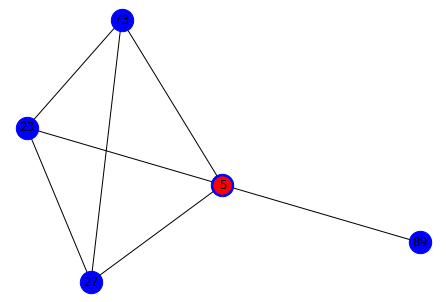

In [28]:
from operator import itemgetter
node_and_degree = Gx.degree()

n = '5'

(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

hub_ego = nx.ego_graph(Gx, n, distance= 'weight')

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=500, with_labels=True)

# # Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=n, **options)
plt.show()

In [29]:
# dict(hub_ego.degree).values()
clusters=np.array(list(set(dict(hub_ego.degree).values())))
dict(hub_ego.degree)

{'23': 5, '27': 5, '5': 4, '73': 5, '89': 1}

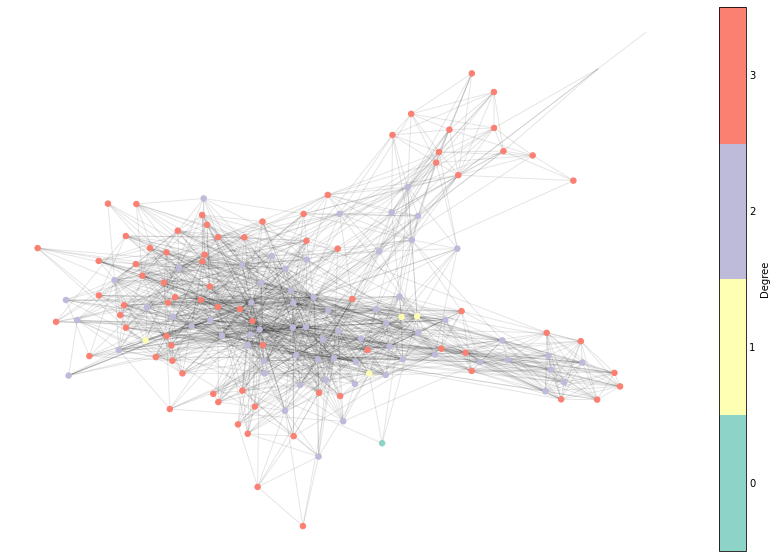

In [80]:
plt.figure(figsize=(15,10))
length=dict(nx.all_pairs_dijkstra_path_length(Gx,cutoff=3))
# print(length[1][4])
measures= length['5']
clusters = np.array(list(set(measures.values())))

# colors = [G[u][v]['color'] for u,v in clusters]

# plt.figure()
pos = nx.spring_layout(Gx)

edges = nx.draw_networkx_edges(Gx, pos, edge_cmap=mcolors.ListedColormap(plt.cm.Set3(clusters)), alpha=0.1)

# Create the plot of the network to be placed in the figure
nodes = nx.draw_networkx_nodes(Gx, pos, node_size=30, cmap=mcolors.ListedColormap(plt.cm.Set3(clusters)), 
                                node_color=list(measures.values()),
                                nodelist=list(measures.keys()))



# Create the title of the plot
# plt.title(measure_name)

# # Add a colour bar to act as a legend
cb = plt.colorbar(nodes,ticks=range(0,len(clusters)), label='Degree')
cb.ax.tick_params(length=0)
# Adds the community labels to the colour bar
cb.set_ticklabels(list(set(measures.values())))


nodes.set_clim(-0.5, len(clusters)-0.5)

# Show the plot without the x/y axis
plt.axis('off')
plt.show()


In [77]:
mcolors.ListedColormap(plt.cm.Set3(clusters))

In [ ]:
def short_path_plot(G,source,target):
    '''This function calculates the shortest path between two nodes in a network
    
    Attributes:
    G: The networkx object
    source: Name of the source node
    target: Name of the source node'''
    
    pos = nx.spring_layout(G) #<-- Set the layout of the network
    nx.draw(G,pos,node_color='k', with_labels=True, font_color='white') #<-- Plot the original network in black

    path = nx.shortest_path(G,source=14,target=16) #<-- Select the nodes in the shortest path
    print(path)
    path_edges = list(zip(path,path[1:])) #<-- Create a list of iterables with the edges of the shortest path
    nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r', label=True)  #<-- Plot the nodes
    nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=10)  #<-- Plot the edges
    plt.axis('equal')
    plt.show()
    return

#Run the created funtion


In [ ]:
# R = nx.karate_club_graph() #<-- R will be an existing famous network of networkx

#We will detected the shorstet path from one node to the other one
source=14  #<-- Source node
target=5  #<-- Target node

# short_path_plot(Gx,source,target)
nx.shortest_path_length(Gx,2,4)


In [ ]:
# draw(DiG, dpos, nx.katz_centrality(DiG, alpha=0.1, beta=1.0), 'DiGraph Katz Centrality')

# SI Model